In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [10]:
len(X_train)

60000

In [11]:
len(X_test)

10000

In [12]:
X_train[0].shape

(28, 28)

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

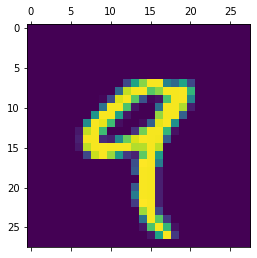

In [16]:
plt.matshow(X_train[4])

In [17]:
y_train[4]

9

In [18]:
X_train.shape

(60000, 28, 28)

In [23]:
len(X_train[3])

28

In [29]:
#SCALLING
X_train = X_train/255
X_test = X_test/255

In [30]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [31]:
X_train_flattened.shape

(60000, 784)

In [34]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (28*28,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4893 - accuracy: 0.8774
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3058 - accuracy: 0.9156
Epoch 3/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2850 - accuracy: 0.9212s - loss: 0.2854 - accuracy: 0.92 - ETA: 0s - loss: 0.2854 - accuracy: 0.
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2748 - accuracy: 0.9247
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2682 - accuracy: 0.9258s - loss: 0 - ETA: 0s - loss: 0.2698 - accuracy


In [35]:
model.evaluate(X_test_flattened, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.26891319717466833, 0.9255]

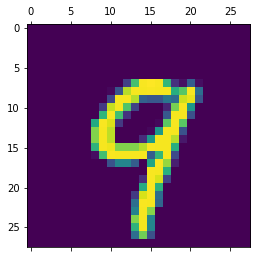

In [43]:
x = 12
plt.matshow(X_test[x])

In [44]:
y_predict = model.predict(X_test_flattened)
y_predict[x]

array([1.4901161e-07, 0.0000000e+00, 2.6822090e-07, 4.8279762e-06,
       1.4024973e-04, 5.9902668e-06, 5.9604645e-08, 5.1623583e-04,
       2.6583672e-05, 1.0429323e-02], dtype=float32)

In [45]:
np.argmax(y_predict[x])

9

In [46]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]


[7, 2, 1, 0, 4]

In [47]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [55]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)
cm

<tf.Tensor: id=30982, shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   9,    8,  923,   15,    6,    5,   14,   13,   36,    3],
       [   4,    0,   19,  917,    0,   25,    2,   17,   21,    5],
       [   1,    1,    5,    0,  908,    0,   14,    6,    9,   38],
       [   9,    3,    3,   26,    9,  784,   15,    9,   27,    7],
       [  10,    3,    5,    1,    7,   14,  915,    2,    1,    0],
       [   1,    6,   23,    3,    3,    0,    0,  972,    1,   19],
       [   8,   10,    7,   20,    9,   28,    9,   16,  860,    7],
       [  11,    7,    1,   10,   26,    8,    0,   46,    3,  897]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

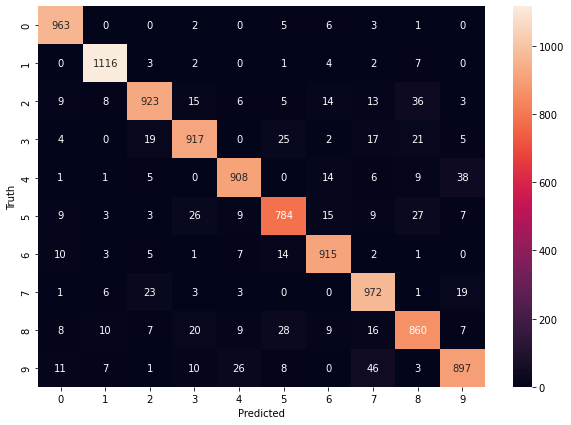

In [58]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
#MODEL WITH HIDDEN LAYERS

model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (28*28,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid') #hidden layer with 100 nurons
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2910 - accuracy: 0.9176
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1363 - accuracy: 0.9603
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0988 - accuracy: 0.9704s - loss: 0.0983 - accuracy: 0.
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0770 - accuracy: 0.9773s - loss: 0.0782 - accuracy: 0.
Epoch 5/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0625 - accuracy: 0.9815


In [61]:
model.evaluate(X_test_flattened, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0851634175200481, 0.9753]

Text(69.0, 0.5, 'Truth')

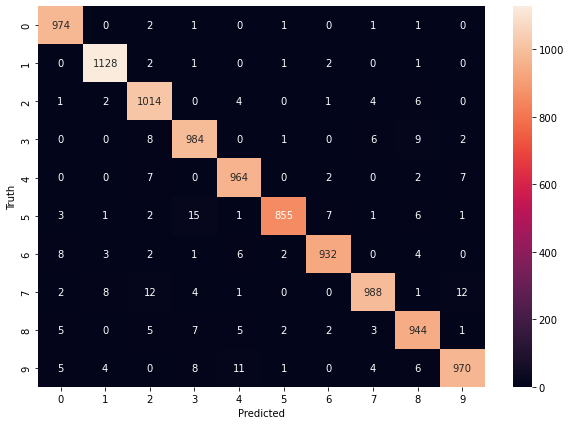

In [62]:
y_predict = model.predict(X_test_flattened)
y_predict_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
#MODEL WITHOUT SEPERATE FLATTENED ARRAY

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #making the X_train array flattened
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid') #hidden layer with 100 nurons
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2855 - accuracy: 0.9211
Epoch 2/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1334 - accuracy: 0.9619s -
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0945 - accuracy: 0.9720
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0754 - accuracy: 0.9774
Epoch 5/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0588 - accuracy: 0.9825s - loss: 0.0587 - accuracy: 0.
